In [61]:
import wntr
import csv
import pandas as pd
# import plotly.express as px

In [62]:
# Create the network
inp_file = 'minitown_map_epanetCPA.inp'
wn = wntr.network.WaterNetworkModel(inp_file)


In [63]:
wn.options.time.duration

604800

In [65]:
# Set option for step-by-step simulation
# wn.options.time.duration = 900
wn.options.time.hydraulic_timestep = 900
wn.options.time.pattern_timestep = 3600
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim(convergence_error=True)

In [66]:
tank_l0 = results.node['pressure']['TANK']

In [67]:
len(results.node['pressure'])

673

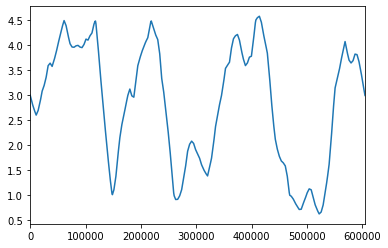

In [68]:
results.node['pressure'].TANK.plot()

In [78]:
# Create the network
inp_file = 'minitown_map_epanetCPA.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Set option for step-by-step simulation
wn.options.time.duration = 900
wn.options.time.hydraulic_timestep = 900
wn.options.time.pattern_timestep = 3600
sim = wntr.sim.WNTRSimulator(wn)

result_list = [['hour', 'time','timestamp','tank_level', 'pump1_status', 'pump2_status']]




In [79]:
for hour in range(0, 687):
    # print("HOUR: %d ------------------------" % hour)

    results = sim.run_sim(convergence_error=True)
    
    if not results.time:
        pass
    else:
        if hour == 0:
            tank = results.node['pressure']['TANK'].iloc[0]
            pump1 = results.link['status']['PUMP1'].iloc[0]
            pump2 = results.link['status']['PUMP2'].iloc[0]
            result_list.append([hour, results.time[0], 0, tank, pump1, pump2])
            tank = results.node['pressure']['TANK'].iloc[1]
            pump1 = results.link['status']['PUMP1'].iloc[1]
            pump2 = results.link['status']['PUMP2'].iloc[1]
            result_list.append([hour, results.time[1], results.timestamp, tank, pump1, pump2])                        
        if results.time:
            tank = results.node['pressure']['TANK'].iloc[0]
            pump1 = results.link['status']['PUMP1'].iloc[0]
            pump2 = results.link['status']['PUMP2'].iloc[0]
            result_list.append([hour, results.time[0], results.timestamp,tank, pump1, pump2])    

In [80]:
df = pd.DataFrame(columns=['hour', 'time','timestamp','tank_level', 'pump1_status', 'pump2_status'],data=result_list[1:])

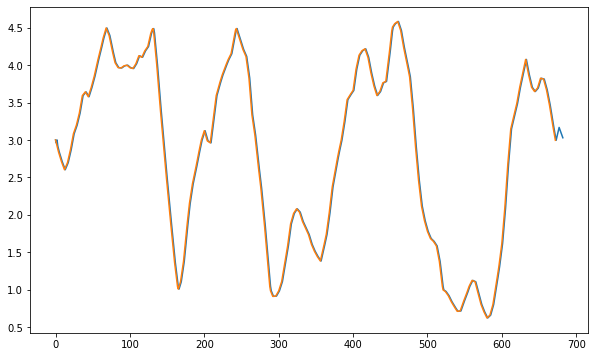

In [81]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,figsize=(10,6))
ax.plot(df['tank_level'].values)
ax.plot(tank_l0.values)